In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
data=pd.read_csv("/gdrive/My Drive/Fake News/Complete_processed_news_data.csv")
data.head()

,Unnamed: 0,News,Result
0,0,washington reuters head conservative republica...,0
1,1,washington reuters transgender people allowed ...,0
2,2,washington reuters special counsel investigati...,0
3,3,washington reuters trump campaign adviser geor...,0
4,4,seattle washington reuters president donald tr...,0


In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data.head()

,News,Result
0,washington reuters head conservative republica...,0
1,washington reuters transgender people allowed ...,0
2,washington reuters special counsel investigati...,0
3,washington reuters trump campaign adviser geor...,0
4,seattle washington reuters president donald tr...,0


Splitting the data into train dataset and test dataset 

In [ ]:
X=data['News']
Y=data['Result']
#train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


In [ ]:
#printing the shapes of the train and test datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(31428,)
(31428,)
(13470,)
(13470,)


## **Bag of Words**

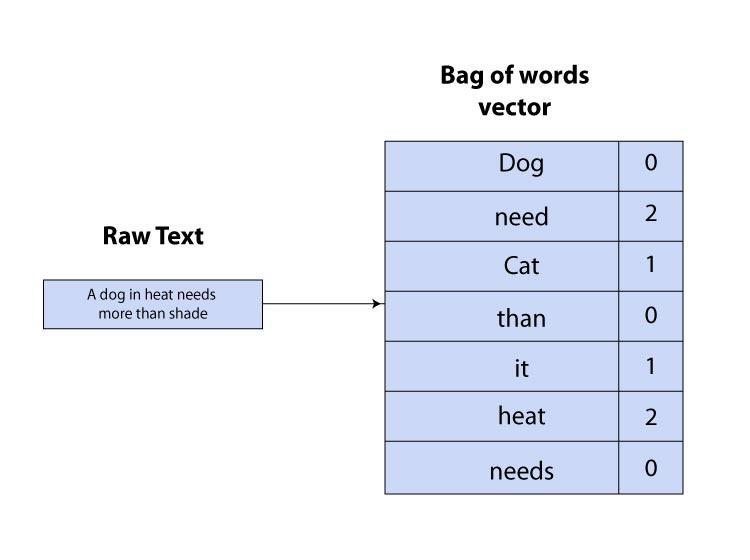

1. Bag of Words (BOW) is a method to extract features from text documents.

2. It creates a vocabulary of all the unique words occurring in all the documents in the training set.
3. used in methods of document classification,sentiment analysis where the (frequency of) occurrence of each word is used as a feature for training a classifier.


In [ ]:
#converting the words into vectors using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500,ngram_range=(2,2))
x_train_bow=cv.fit_transform(x_train.values.astype('U')).toarray()

## Building a Model using Multinomial Naive Bayes

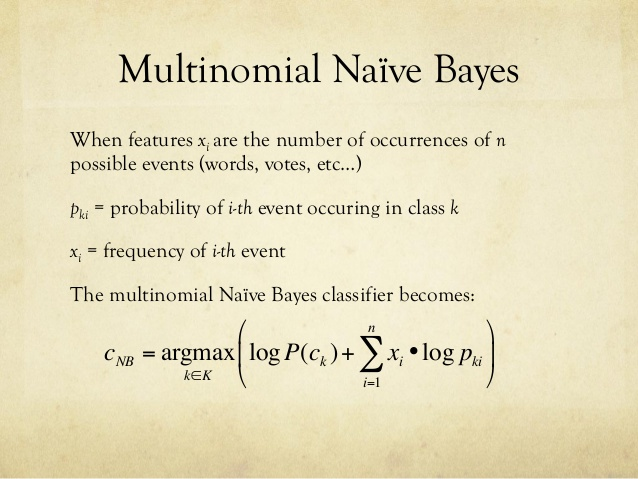


    What is Multinomial Naive Bayes?
    Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents.
    Whereas simple naive Bayes would model a document as the presence and absence of particular words.
    Multinomial naive Bayes explicitly models the word counts and adjusts the underlying calculations to deal within.

Why Multinomial Naive Bayes?

    We already know it is very well suited for Text data.
    Because it uses frequency method for model training.
    That's why I have chosen Multinomial Naive Bayes for building a model.


In [ ]:
#Model Development
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(x_train_bow,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#prediction for multinomial Naivebayes
x_test_bow=cv.transform(x_test.values.astype('U')).toarray()


In [ ]:
pred_mul_nb=mul_nb.predict(x_test_bow)

In [ ]:
pred_mul_nb

array([0, 1, 0, ..., 1, 1, 0])

## **Classification Evaluation Metrics**
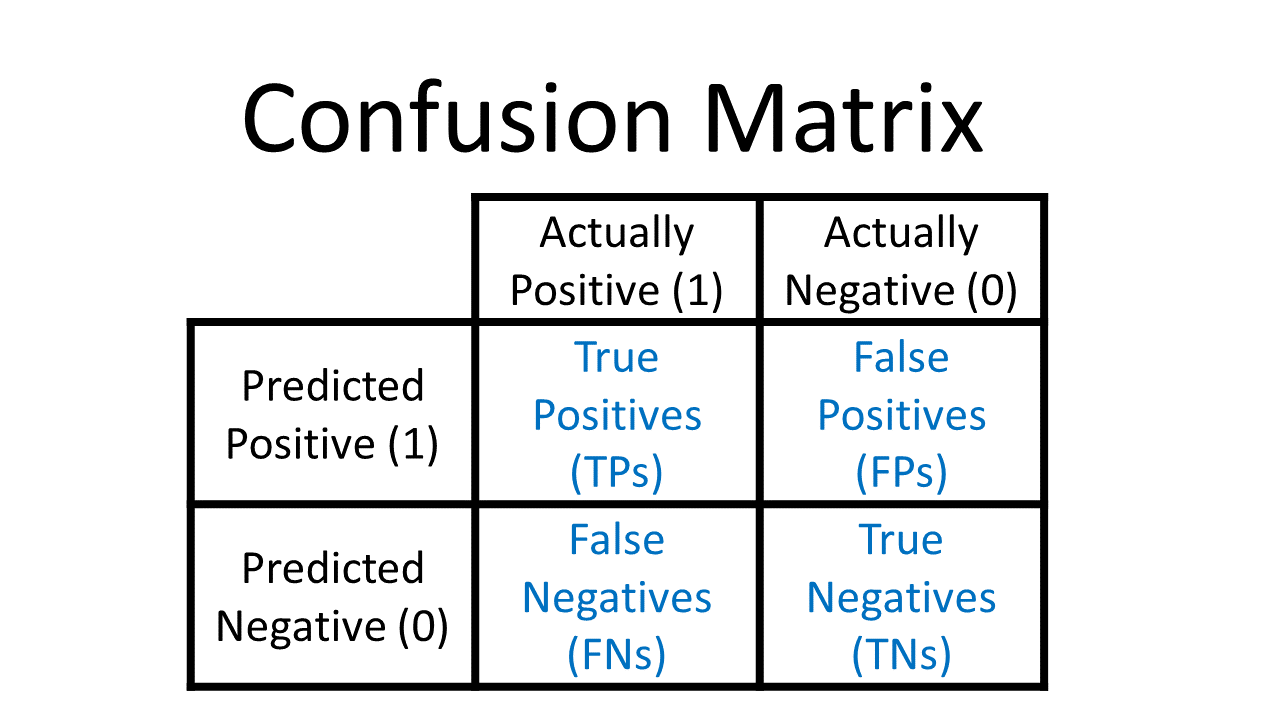


    Confusion matrix
    Classification Report
    Accuracy Score


In [ ]:
#Evaluation metrics for Multinomial Naive bayes
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_mul_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_mul_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_mul_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6203  176]
 [ 379 6712]]
The accuracy score for the model is :  0.9587973273942093
The classification report for the model :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6379
           1       0.97      0.95      0.96      7091

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



## Building a Naive bayes Model

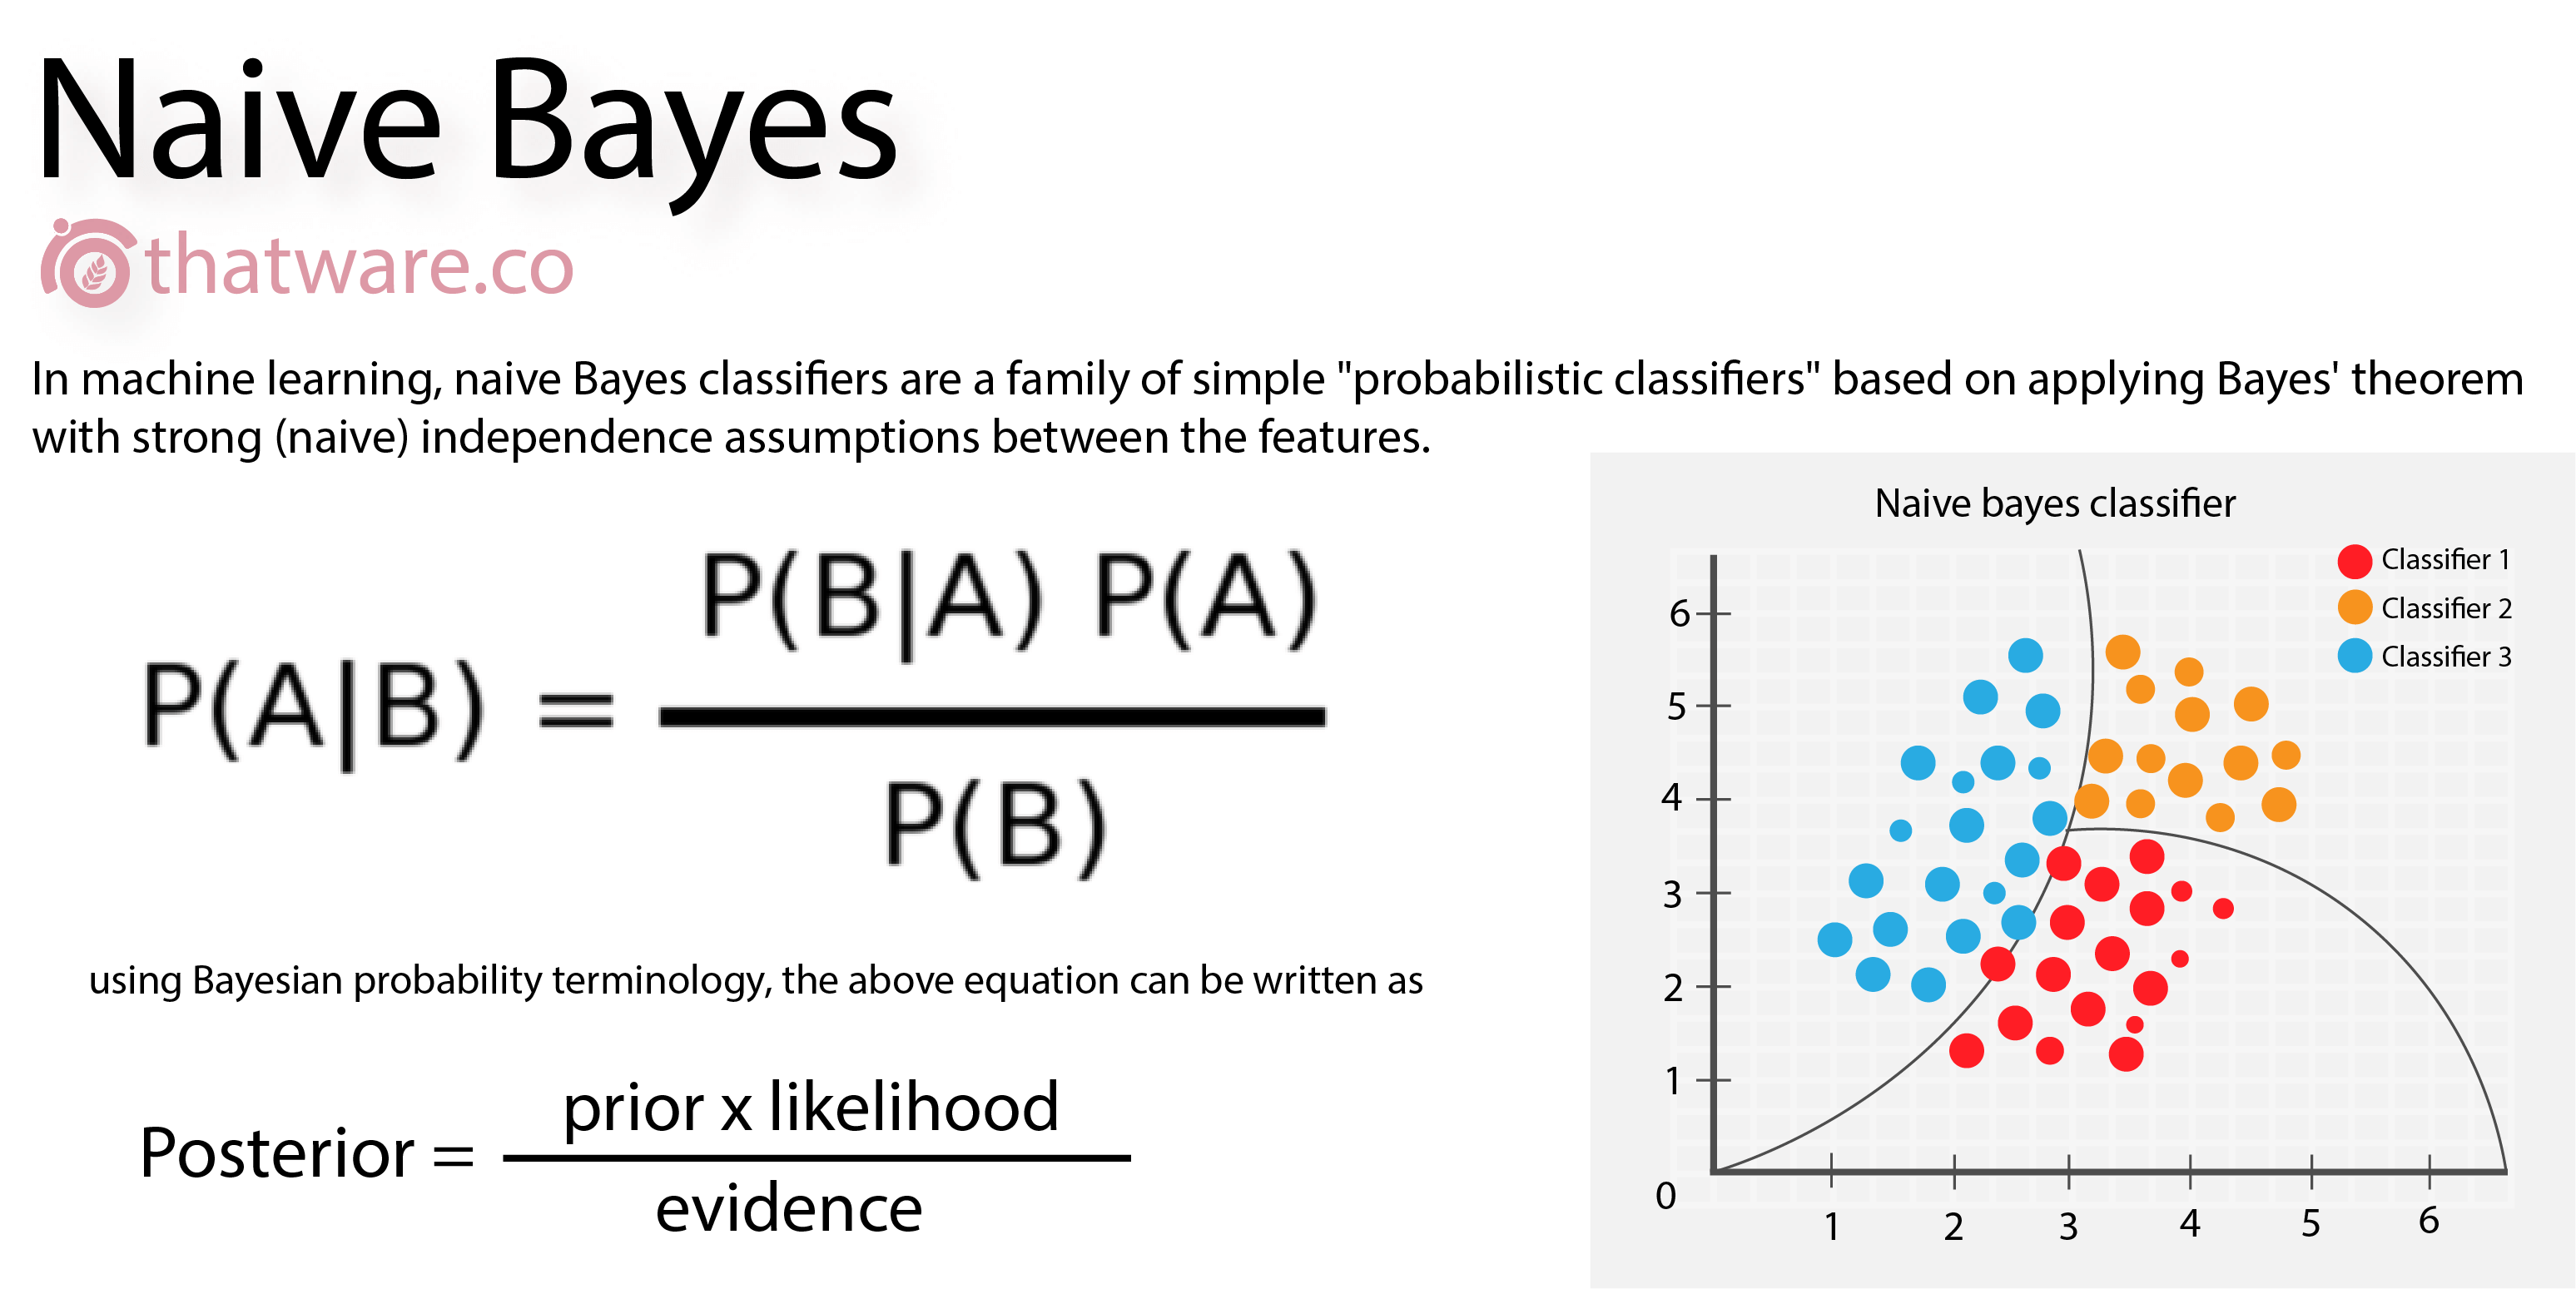
    It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors.
    In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


In [ ]:
#2.NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_bow,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#prediction for naivebayes
pred_nb=nb.predict(x_test_bow)
pred_nb

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#Evaluation metrics for Naive bayes
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6270  109]
 [ 953 6138]]
The accuracy score for the model is :  0.9211581291759465
The classification report for the model :
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6379
           1       0.98      0.87      0.92      7091

    accuracy                           0.92     13470
   macro avg       0.93      0.92      0.92     13470
weighted avg       0.93      0.92      0.92     13470



## Building a RandomForest 

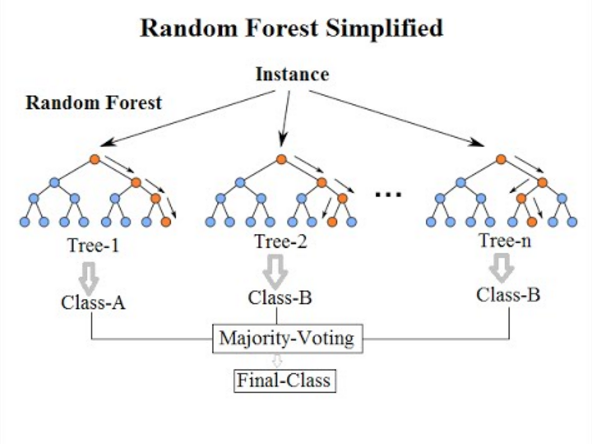


    A random forest is one of the ensemble techniques and meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

    The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Why I have chosen RandomForest classifier?

    The model runs on multiple decision trees and select the output based on voting classifier(for classification).
    So it gives better accuracy and prevents overfitting.
    The main important thing is it produces low bias and low variance.


In [ ]:
#3.Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,criterion='gini')
rf.fit(x_train_bow,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prediction for randomforest
pred_rf=rf.predict(x_test_bow)
print(pred_rf)

[1 1 0 ... 1 1 0]


In [ ]:
#Evaluation metrics for Multinomial Naive bayes
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_nb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_nb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_nb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6270  109]
 [ 953 6138]]
The accuracy score for the model is :  0.9211581291759465
The classification report for the model :
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      6379
           1       0.98      0.87      0.92      7091

    accuracy                           0.92     13470
   macro avg       0.93      0.92      0.92     13470
weighted avg       0.93      0.92      0.92     13470



## Adaboost Classifier

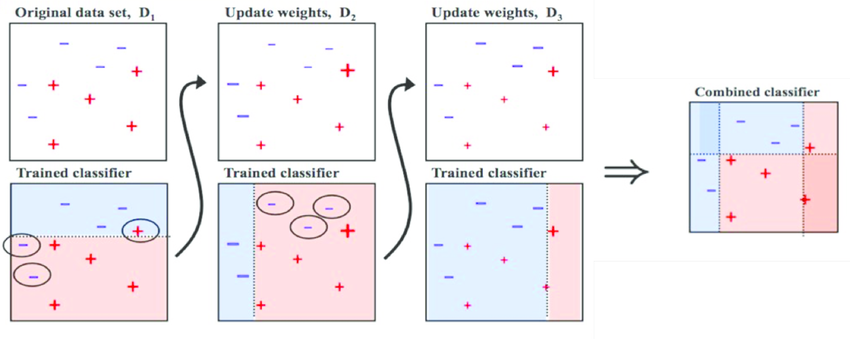

1.  AdaBoost is an iterative ensemble method. 
2. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”
3.  AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well.

4. It combines multiple classifiers to increase the accuracy of classifiers.

5. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier


In [ ]:
#4.Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=300,random_state=1)
adb.fit(x_train_bow, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=1)

In [ ]:
#prediction for adabosst
pred_adb=adb.predict(x_test_bow)
print(pred_adb)

[0 1 0 ... 1 1 0]


In [ ]:
#Evaluation metrics for AdaboostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# 1. Confusion matrix
confu_matrix=confusion_matrix(y_test,pred_adb)
print('Confusion for the model is :\n ',confu_matrix)

# 2. Accuracy score
accu_score=accuracy_score(y_test,pred_adb)
print('The accuracy score for the model is : ',accu_score)
# 3. Classification report
report=classification_report(y_test,pred_adb)
print('The classification report for the model :\n',report)

Confusion for the model is :
  [[6084  295]
 [ 150 6941]]
The accuracy score for the model is :  0.9669636228656273
The classification report for the model :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      6379
           1       0.96      0.98      0.97      7091

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470

